In [53]:
import numpy as np
import pandas as pd
from scipy.sparse.linalg import svds
from scipy.sparse import csc_matrix

from sklearn

import matplotlib.pyplot as plt
import pickle


In [60]:
# Read in CSV containing patient identifier, admission identifier, and associates diagnoses

df_diagnoses = pd.read_csv('./DIAGNOSES_ICD.csv')

In [3]:
df_diagnoses.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


In [4]:
# Drop ROW_ID, SEQ_NUMand HADM_ID columns

df_diagnoses.drop(labels = ['ROW_ID', 'SEQ_NUM', 'HADM_ID'], axis = 1, inplace = True)

In [5]:
df_diagnoses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651047 entries, 0 to 651046
Data columns (total 2 columns):
SUBJECT_ID    651047 non-null int64
ICD9_CODE     651000 non-null object
dtypes: int64(1), object(1)
memory usage: 9.9+ MB


In [6]:
# Check for nulls

df_diagnoses.isnull().sum()

SUBJECT_ID     0
ICD9_CODE     47
dtype: int64

In [7]:
# Drop rows with null ICD9 codes

df_diagnoses.dropna(inplace = True)

df_diagnoses.isnull().sum()

SUBJECT_ID    0
ICD9_CODE     0
dtype: int64

In [8]:
# Check for duplicate rows

df_diagnoses.duplicated().sum()

64128

In [9]:
# Drop duplicates and reset index

df_diagnoses = df_diagnoses[np.logical_not(df_diagnoses.duplicated())]

In [10]:
df_diagnoses.duplicated().sum()

0

In [11]:
df_diagnoses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586872 entries, 0 to 651046
Data columns (total 2 columns):
SUBJECT_ID    586872 non-null int64
ICD9_CODE     586872 non-null object
dtypes: int64(1), object(1)
memory usage: 13.4+ MB


In [12]:
# Reset the index

df_diagnoses.reset_index(inplace = True)
df_diagnoses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586872 entries, 0 to 586871
Data columns (total 3 columns):
index         586872 non-null int64
SUBJECT_ID    586872 non-null int64
ICD9_CODE     586872 non-null object
dtypes: int64(2), object(1)
memory usage: 13.4+ MB


In [13]:
# Dummy the ICD9 codes

df_pat_diags = pd.get_dummies(df_diagnoses, columns = ['ICD9_CODE'], prefix = ['ICD9'])

In [14]:
df_pat_diags.head()

,index,SUBJECT_ID,ICD9_0030,ICD9_0031,ICD9_0038,ICD9_0039,ICD9_0041,ICD9_0048,ICD9_0049,ICD9_0051,...,ICD9_V8801,ICD9_V8811,ICD9_V8812,ICD9_V8821,ICD9_V9010,ICD9_V902,ICD9_V9039,ICD9_V9081,ICD9_V9089,ICD9_V9103
0,0,109,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,109,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,109,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,109,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,109,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Drop index column

df_pat_diags.drop(labels=['index'], axis=1, inplace=True)

In [19]:
# Group dataframe by SUBJECT_ID

df_pat_diags_grouped = df_pat_diags.groupby('SUBJECT_ID')

In [20]:
# Sum each column to determine whether patient has the given diagnosis or not

df_pat_to_diag_matrix = df_pat_diags_grouped.sum()

In [21]:
df_pat_to_diag_matrix.head()

,ICD9_0030,ICD9_0031,ICD9_0038,ICD9_0039,ICD9_0041,ICD9_0048,ICD9_0049,ICD9_0051,ICD9_00581,ICD9_0059,...,ICD9_V8801,ICD9_V8811,ICD9_V8812,ICD9_V8821,ICD9_V9010,ICD9_V902,ICD9_V9039,ICD9_V9081,ICD9_V9089,ICD9_V9103
SUBJECT_ID,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_pat_to_diag_matrix.to_pickle('./PATIENT_DIAGNOSIS_MATRIX.pkl')

In [23]:
df_pat_to_diag_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46517 entries, 2 to 99999
Columns: 6984 entries, ICD9_0030 to ICD9_V9103
dtypes: uint8(6984)
memory usage: 310.2 MB


In [94]:
pat_diag_df = pd.read_pickle("./PATIENT_DIAGNOSIS_MATRIX.pkl")

In [90]:
pat_diag_df.shape

(46517, 6984)

In [95]:
pat_diag_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46517 entries, 2 to 99999
Columns: 6984 entries, ICD9_0030 to ICD9_V9103
dtypes: uint8(6984)
memory usage: 310.2 MB


In [96]:
pat_diag_df.reset_index(inplace=True, drop=True)

In [97]:
pat_diag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46517 entries, 0 to 46516
Columns: 6984 entries, ICD9_0030 to ICD9_V9103
dtypes: uint8(6984)
memory usage: 309.8 MB


In [114]:
# Create 15,000 patient dataframe to make size manageable

small_df = pat_diag_df.head(30000)

In [115]:
small_df.head()

,ICD9_0030,ICD9_0031,ICD9_0038,ICD9_0039,ICD9_0041,ICD9_0048,ICD9_0049,ICD9_0051,ICD9_00581,ICD9_0059,...,ICD9_V8801,ICD9_V8811,ICD9_V8812,ICD9_V8821,ICD9_V9010,ICD9_V902,ICD9_V9039,ICD9_V9081,ICD9_V9089,ICD9_V9103
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
# Drop columns that don't have any diagnoses set

small_df = small_df.loc[:, (small_df != 0).any(axis=0)]

In [117]:
small_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 5899 entries, ICD9_0030 to ICD9_V9089
dtypes: uint8(5899)
memory usage: 168.8 MB


In [118]:
pat_diag_matrix = small_df.as_matrix().astype(float)

In [119]:
pat_diag_sparse = csc_matrix(pat_diag_matrix)

In [120]:
pat_diag_sparse

<30000x5899 sparse matrix of type '<class 'numpy.float64'>'
	with 326766 stored elements in Compressed Sparse Column format>

In [105]:
pickle.dump(pat_diag_sparse, open('pat_diag_sparse.pkl', 'wb'))

In [122]:
u, s, vt = svds(pat_diag_sparse, k=1000)

In [125]:
u.shape

(30000, 1000)

In [126]:
s.shape

(1000,)

In [127]:
vt.shape

(1000, 5899)

In [128]:
s_diag = np.diag(s[:1000]) 

In [129]:
s_diag.shape

(1000, 1000)

In [48]:
predicted_diagnoses = np.dot(np.dot(u, s_diag),vt)

In [65]:
predicted_diagnoses.shape

(15000, 4798)

In [49]:
# Get the mean squared error
sse = np.sum(np.sum(((predicted_diagnoses - pat_diag_matrix)**2)))

In [64]:
pat_diag_matrix.shape

(15000, 4798)

In [134]:
def plot_num_latents_to_accuracy(u, s, vt, start_num, end_num, step_size) :
    
    num_latent_feats = np.arange(start_num, end_num + 1, step_size)
    sum_errs = []

    for k in num_latent_feats:
        # restructure with k latent features
        s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]
    
        # take dot product
        patient_diagnosis_prediction = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
        # compute error for each prediction to actual value
        diffs = np.subtract(pat_diag_matrix, patient_diagnosis_prediction)
    
        # total errors and keep track of them
        err = np.sum(np.sum(np.abs(diffs)))
        sum_errs.append(err)
    
    
    plt.plot(num_latent_feats, 1 - (np.array(sum_errs)/(pat_diag_matrix.shape[0] * pat_diag_matrix.shape[1])));
    plt.xlabel('Number of Latent Features');
    plt.ylabel('Accuracy');
    plt.title('Accuracy vs. Number of Latent Features');

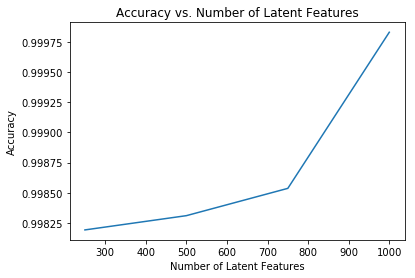

In [139]:
plot_num_latents_to_accuracy(u, s, vt, 250, 1000, 250)